In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [2]:
data = pd.read_csv("column_2C_weka.csv")

In [3]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

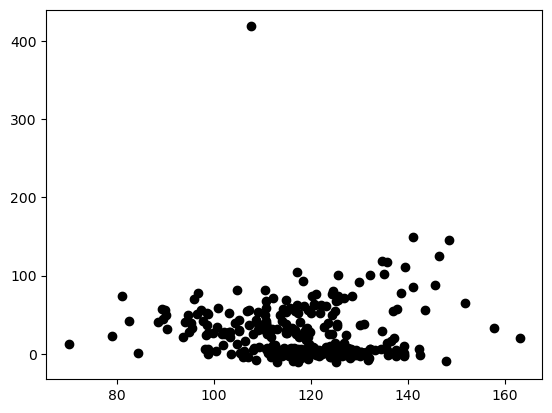

In [5]:
plt.scatter(x = data["pelvic_radius"],y = data["degree_spondylolisthesis"],color = "black")
x = data["pelvic_radius"]
y = data["degree_spondylolisthesis"]

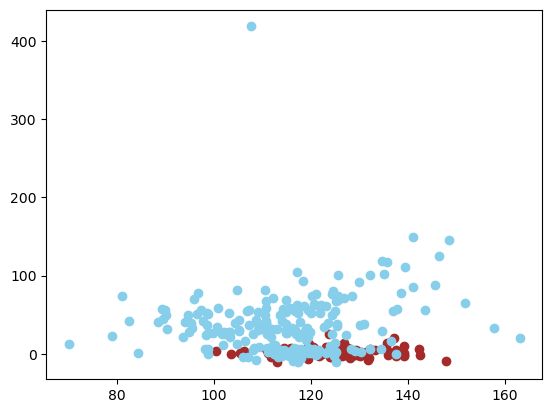

In [10]:
plt.scatter(x = data[data["class"] == "Normal"].pelvic_radius , y = data[data["class"] == "Normal"].degree_spondylolisthesis,color = "brown")
plt.scatter(x = data[data["class"] == "Abnormal"].pelvic_radius , y = data[data["class"] == "Abnormal"].degree_spondylolisthesis,color = "skyblue")

# K-Means Cluster

C:\Users\Sap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


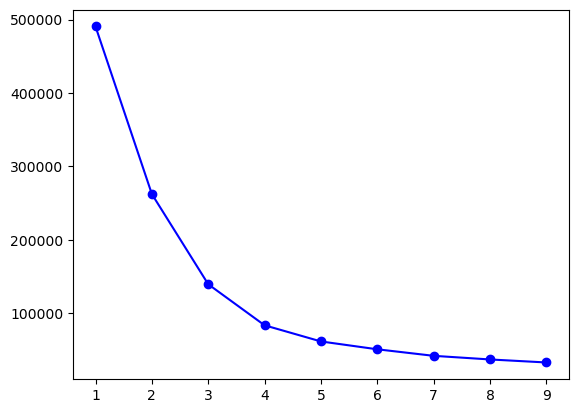

In [13]:
cluster_data_arg = {"x":x,"y":y}
cluster_data = pd.DataFrame(cluster_data_arg)
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color="blue",marker='o')
plt.show()

In [14]:
kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(cluster_data)
data["label"] = clusters

In [16]:
data_ac = pd.read_csv("column_2C_weka.csv")
data_ac["class"] = [0 if each == "Abnormal" else 1 for each in data_ac["class"]]
data_ac_class = data_ac["class"]
predict_class = data["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(data_ac_class - predict_class)*100))

accuracy is : 44.516129032258064


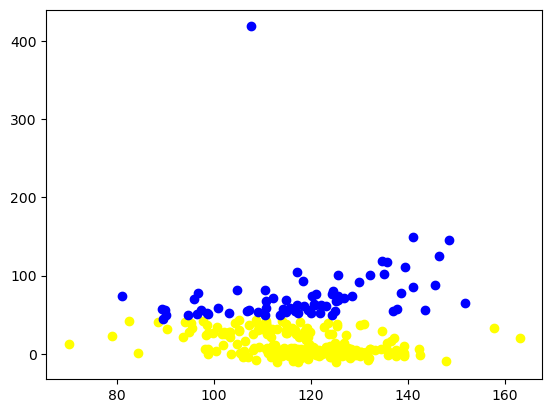

In [17]:
plt.scatter(x = data[data.label == 0].pelvic_radius,y = data[data.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label == 1].pelvic_radius,y = data[data.label == 1].degree_spondylolisthesis , color = "blue")

# Hierarcihal Cluster

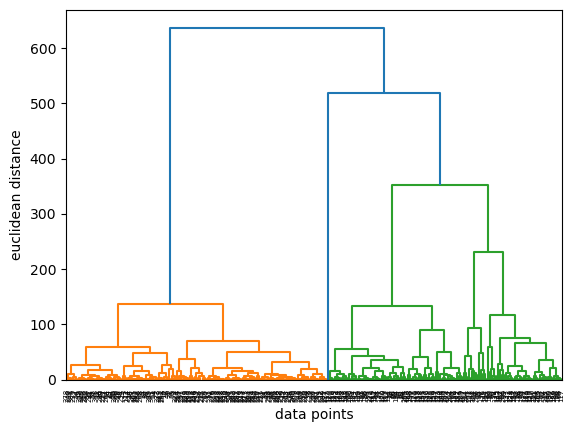

In [20]:
merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [23]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(cluster_data)

data["label_hc"] = cluster

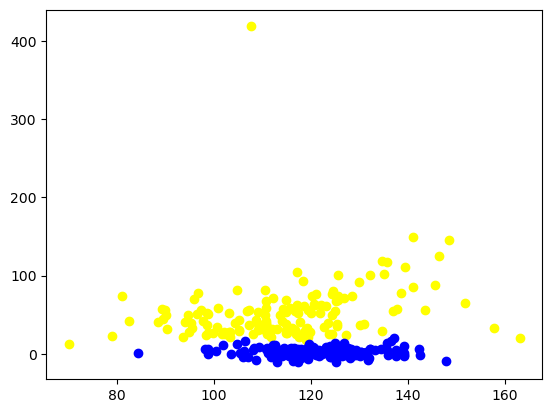

In [24]:
plt.scatter(x = data[data.label_hc == 0].pelvic_radius,y = data[data.label_hc == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label_hc == 1].pelvic_radius,y = data[data.label_hc == 1].degree_spondylolisthesis , color = "blue")

In [25]:
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100)))
hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100))

accuracy is : 78.38709677419355
